# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [63]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")
nltk.download('stopwords') # downloads the stopwords dataset


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Nishok/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
# Add any additional import statements you need here
import matplotlib.pyplot as plt

In [67]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/Nishok/Downloads/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [71]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
        print(f"The {num_tokens} most common tokens: {Counter(tokens).most_common(num_tokens)}")
        print(f"The {num_tokens} most common tokens: {Counter(tokens).most_common(num_tokens)}")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [74]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 13 most common tokens: [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1), ('with', 1), ('other', 1), ('in', 1), ('this', 1)]
The 13 most common tokens: [('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1), ('with', 1), ('other', 1), ('in', 1), ('this', 1)]


AssertionError: 

Q: Why is it beneficial to use assertion statements in your code? 

A: It is beneficial to use assertion statements in my code because these statements automatically check if a function returns the correct output. This is useful in catching errors early on in the development process.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [75]:
# Read in the lyrics data


In [78]:
lyrics_dir = '/Users/Nishok/Downloads/M1 Results/lyrics'

def read_lyrics(lyrics_dir):
    lyrics_data = {}
    for artist in os.listdir(lyrics_dir):
        artist_path = os.path.join(lyrics_dir, artist)
        
        # Check if the path is a directory, skip if it's a file like '.DS_Store'
        if os.path.isdir(artist_path):
            lyrics_data[artist] = {}
            for song in os.listdir(artist_path):
                song_path = os.path.join(artist_path, song)
                
                # Check if the song file is valid
                if os.path.isfile(song_path):
                    with open(song_path, 'r', encoding='utf-8') as file:
                        lyrics_data[artist][song] = file.read()
    return lyrics_data

# Call the function to load the lyrics data
lyrics_data = read_lyrics(lyrics_dir)

In [80]:
# Read in the twitter data
twitter_dir = '/Users/Nishok/Downloads/M1 Results/twitter'

def read_twitter_data(twitter_dir):
    twitter_data = {}
    
    for twitter_file in os.listdir(twitter_dir):
        file_path = os.path.join(twitter_dir, twitter_file)
        
        # Check if the path is a valid file (not a directory)
        if os.path.isfile(file_path):
            artist = twitter_file.replace('.txt', '')  # Use filename (without extension) as the artist key
            
            # Try reading the file with utf-8 encoding
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    twitter_data[artist] = file.read().splitlines()  # Split by line to get individual tweets
            except UnicodeDecodeError:
                # If utf-8 fails, try latin-1 encoding (common fallback)
                try:
                    with open(file_path, 'r', encoding='latin-1') as file:
                        twitter_data[artist] = file.read().splitlines()
                except Exception as e:
                    print(f"Failed to read {twitter_file}: {e}")
    
    return twitter_data

# Call the function to load the twitter data
twitter_data = read_twitter_data(twitter_dir)

# 1. Print the artist names to confirm they are loaded
print("Artists with Twitter data:", list(twitter_data.keys()))

# 2. Print a preview of the Twitter data for each artist
for artist, tweets in twitter_data.items():
    print(f"\nTweets for {artist}:")
    print(tweets[:5])  # Print the first 5 tweets to preview
    break  # Preview only the first artist

Artists with Twitter data: ['.DS_Store', 'cher_followers_data', 'robynkonichiwa_followers_data', 'cher_followers', 'robynkonichiwa_followers']

Tweets for .DS_Store:
['\x00\x00\x00\x01Bud1\x00\x00\x10\x00\x00\x00\x08\x00\x00\x00\x10\x00\x00\x00\x00%\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [85]:
punctuation = set(punctuation) # speeds up comparison

def clean_text(text):
    # Step 1: Remove punctuation
    text_no_punct = remove_punctuation(text)
    
    # Step 2: Lowercase the text
    text_lower = to_lowercase(text_no_punct)
    
    # Step 3: Split text into tokens
    tokens = split_into_tokens(text_lower)
    
    # Step 4: Remove stopwords
    clean_tokens = remove_stopwords(tokens)
    
    return clean_tokens

In [84]:
# create your clean twitter data here

clean_twitter_data = {}
for artist, tweets in twitter_data.items():
    clean_twitter_data[artist] = [clean_text(tweet) for tweet in tweets['description']]

TypeError: list indices must be integers or slices, not str

In [88]:
clean_twitter_data = {}

for artist, tweets in twitter_data.items():
    # If tweets is a list of dictionaries, each containing a 'description'
    clean_twitter_data[artist] = [clean_text(tweet['description']) for tweet in tweets]

TypeError: string indices must be integers, not 'str'

In [57]:
# create your clean lyrics data here
clean_lyrics_data = {}
for artist, songs in lyrics_data.items():
    clean_lyrics_data[artist] = {song: clean_text(lyrics) for song, lyrics in songs.items()}

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [58]:
# calls to descriptive_stats here

# Twitter descriptive stats
for artist, data in clean_twitter_data.items():
    all_tweets = [token for tweet in data for token in tweet]
    print(f"Twitter stats for {artist}:")
    descriptive_stats(all_tweets)

# Lyrics descriptive stats
for artist, songs in clean_lyrics_data.items():
    all_lyrics = [token for song, lyrics in songs.items() for token in lyrics]
    print(f"Lyrics stats for {artist}:")
    descriptive_stats(all_lyrics)

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data, the 'top 5 words' would be common words such as 'as', 'is', 'the', 'a', or 'and'. This would likely not yield any meaningful results.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I expected the lexical diversity between the artists to be significant due to a difference in genres and writing styles.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [30]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [59]:
# Your code here
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

def most_common_emojis(twitter_data, n=10):
    emoji_counter = Counter()
    for artist, tweets in twitter_data.items():
        for tweet in tweets['description']:
            emojis = extract_emojis(tweet)
            emoji_counter.update(emojis)
    
    return emoji_counter.most_common(n)

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [60]:
# Your code here

def extract_hashtags(text):
    return [word for word in text.split() if word.startswith('#')]

def most_common_hashtags(twitter_data, n=10):
    hashtag_counter = Counter()
    for artist, tweets in twitter_data.items():
        for tweet in tweets['description']:
            hashtags = extract_hashtags(tweet)
            hashtag_counter.update(hashtags)
    
    return hashtag_counter.most_common(n)


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [82]:
# Your code here
def most_common_words(clean_twitter_data, n=5):
    word_counter = Counter()
    for artist, tweets in clean_twitter_data.items():
        for tweet in tweets:
            word_counter.update(tweet)  # tweet is a list of cleaned tokens
    
    return word_counter.most_common(n)

In [83]:
common_emojis = most_common_emojis(twitter_data, 10)
print("Top 10 Emojis:", common_emojis)

common_hashtags = most_common_hashtags(twitter_data, 10)
print("Top 10 Hashtags:", common_hashtags)

common_words = most_common_words(clean_twitter_data, 10)
print("Top 10 Words:", common_words)


TypeError: list indices must be integers or slices, not str

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

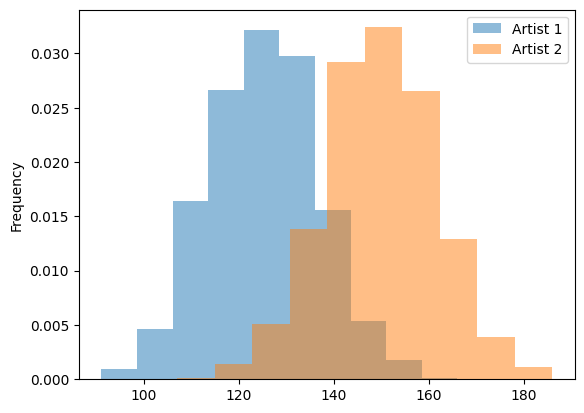

In [36]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The expression matches on one or more white spaces.


In [40]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [49]:
# Your lyric length comparison chart here. 

# Create a DataFrame for song lengths
song_lengths = []
for artist, songs in clean_lyrics_data.items():
    for song, tokens in songs.items():
        song_lengths.append({
            'artist': artist,
            'song': song,
            'length': len(tokens)
        })

# Convert to a DataFrame
df_song_lengths = pd.DataFrame(song_lengths)

for artist in df_song_lengths['artist'].unique():
    subset = df_song_lengths[df_song_lengths['artist'] == artist]
    subset['length'].plot(kind='hist', density=True, alpha=0.5, label=artist)

plt.figure(figsize=(10, 6))
plt.legend()
plt.xlabel('Lyric Length (Word Count)')
plt.ylabel('Density')
plt.title('Lyric Length Comparison by Artist')
plt.show()

KeyError: 'artist'

In [51]:
# Create a DataFrame for song lengths
song_lengths = []
for artist, songs in clean_lyrics_data.items():
    for song, lyrics in songs.items():
        song_lengths.append({'artist': artist, 'length': len(lyrics)})

df = pd.DataFrame(song_lengths)
print(df)
df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)
plt.title('Song Lengths by Artist')
plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.show()

Empty DataFrame
Columns: []
Index: []


KeyError: 'artist'